In [26]:
# load all the needed packages for the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data 


In [27]:
data = pd.read_csv('./dataset.csv')

#  read the data to see the values
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [28]:
#  get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [29]:
# explore the target variable to see if it is balanced or not

data['Target']



0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [30]:
#  get the Target unique values

data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [31]:
#  change the values of the target variable to 0 and 1

data['Target']=data['Target'].apply(lambda x: 1 if x=='Graduate' else 0)

In [11]:
data['Target']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4419    1.0
4420    0.0
4421    0.0
4422    1.0
4423    1.0
Name: Target, Length: 4424, dtype: float64

In [32]:
# Get the correlation matrix of the data

data.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.072001
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563,-0.200200
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.093670
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518,0.013850
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.058235
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968,-0.076757
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563,-0.009888
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664,-0.012549
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200,0.015775
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880,0.021483


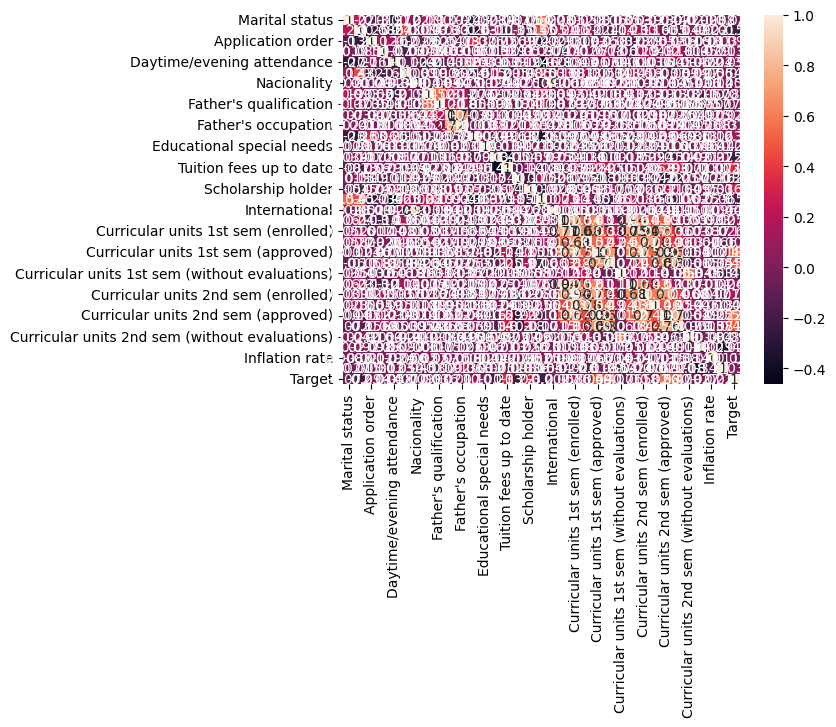

In [34]:
#  plot the correlation matrix to see the correlation between the variables

corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [35]:
# Get the target and features of the data
X = data.drop('Target', axis=1)
y = data['Target']


In [36]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# get the minMax scaler to scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train.shape

(3539, 34)

In [39]:
X_test.shape

(885, 34)

In [40]:
X_test

array([[0.6       , 0.64705882, 0.11111111, ..., 0.40697674, 0.31111111,
        0.80317041],
       [0.        , 0.41176471, 0.11111111, ..., 1.        , 0.24444444,
        0.41479524],
       [0.        , 0.41176471, 0.11111111, ..., 1.        , 0.24444444,
        0.41479524],
       ...,
       [0.        , 0.41176471, 0.11111111, ..., 0.55813953, 0.28888889,
        0.77278732],
       [0.        , 0.        , 0.22222222, ..., 0.40697674, 0.31111111,
        0.80317041],
       [0.        , 0.        , 0.44444444, ..., 0.37209302, 0.48888889,
        0.7661823 ]])

## Build the model using Tensorflow and Keras


In [41]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout



In [42]:
# Build the model to make the predictions

model = Sequential([
    Dense(34,  activation='relu', input_shape=(34,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(34,  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation='sigmoid'),
])


# Get the model summary
model.summary()



/home/brian/miniconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 34)             │         1,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,415 (9.43 KB)

 Trainable params: 2,415 (9.43 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6605 - loss: 1.1974 - val_accuracy: 0.7627 - val_loss: 0.8536
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.7959 - val_accuracy: 0.7887 - val_loss: 0.6582
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.6457 - val_accuracy: 0.7989 - val_loss: 0.5829
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.5641 - val_accuracy: 0.7944 - val_loss: 0.5618
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5386 - val_accuracy: 0.8056 - val_loss: 0.5377
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.5180 - val_accuracy: 0.8181 - val_loss: 0.4998
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8228 - loss: 0.5023 - val_accuracy: 0.8169 - val_loss: 0.4969
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8267 - loss: 0.4785 - val_accu

In [44]:
# make predictions on the test data

predictions = model.predict(X_test)


predictions

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[6.89371526e-02],
       [7.60268986e-01],
       [8.96080792e-01],
       [6.07706010e-01],
       [1.54312828e-03],
       [4.84439373e-01],
       [8.55303705e-01],
       [7.85281956e-01],
       [9.56131458e-01],
       [9.64391470e-01],
       [4.17098343e-01],
       [8.89413714e-01],
       [6.19628310e-01],
       [9.59905684e-01],
       [8.50616336e-01],
       [6.23615444e-01],
       [8.29072177e-01],
       [9.43070829e-01],
       [7.32843578e-02],
       [7.07235515e-01],
       [9.59158897e-01],
       [5.10266924e-04],
       [3.15306778e-03],
       [9.46887076e-01],
       [9.65868115e-01],
       [8.63040566e-01],
       [6.24881778e-03],
       [5.17024815e-01],
       [3.42957824e-01],
       [3.13664391e-03],
       [1.26795039e-01],
       [2.64359219e-03],
       [3.50684881e-01],
       [1.98025675e-03],
       [4.45661470e-02],
       [7.65257657e-01],
       [9.12526309e-01],
       [6.30469441e-01],
       [9.35895920e-01],
       [3.11488301e-01],


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8052 - loss: 0.4338


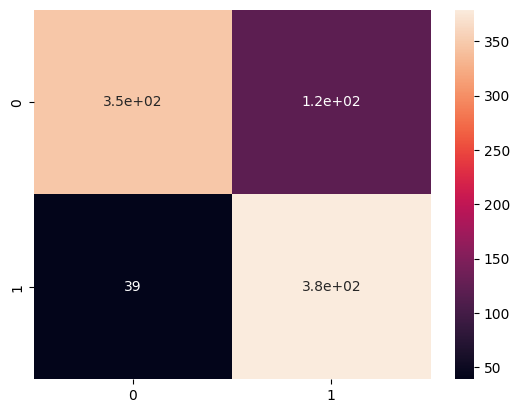

In [46]:
# Evaluate the model to see the accuracy
model.evaluate(X_test, y_test)

# Get the accuracy of the model

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions.round())

# Get the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions.round())

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions.round()), annot=True)
plt.show()


In [47]:
# Get the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.round()))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       467
           1       0.76      0.91      0.83       418

    accuracy                           0.82       885
   macro avg       0.83      0.82      0.82       885
weighted avg       0.83      0.82      0.82       885



# improve the model Accuracy  by using the following techniques:
- Uisng early stopping 
- Dropouts on the model Dense layers 
- L1 and L2 regularization



Epoch 1/100


/home/brian/miniconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4707 - loss: 1.6463 - val_accuracy: 0.4836 - val_loss: 1.1773
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5114 - loss: 1.0951 - val_accuracy: 0.6599 - val_loss: 0.8978
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - loss: 0.8572 - val_accuracy: 0.7571 - val_loss: 0.7305
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.7310 - val_accuracy: 0.7921 - val_loss: 0.6132
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.6464 - val_accuracy: 0.8090 - val_loss: 0.5614
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.6198 - val_accuracy: 0.8102 - val_loss: 0.5446
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 0.6009 - val_accuracy: 0.8215 - val_loss: 0.5278
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7940 - loss: 0.5799 - val_accuracy: 0.8011

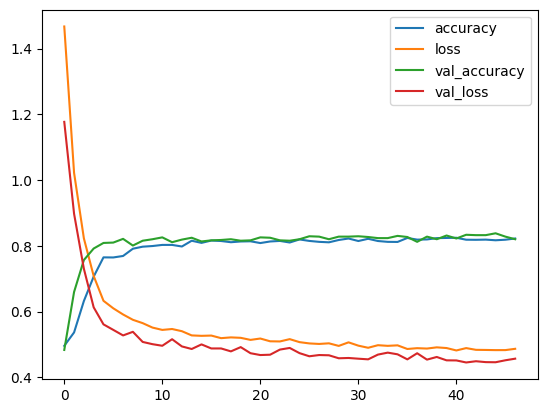

In [51]:
# Use early stopping to stop the model from overfitting

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


model = Sequential([
    Dense(64,  activation='relu', input_shape=(34,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32,  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(16,  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

model_loss = pd.DataFrame(model.history.history)

model_loss.plot()
plt.show()


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


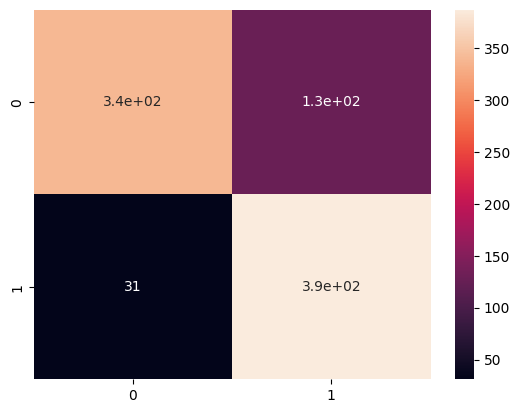

In [52]:
#  Make Predictions on the test data

predictions = model.predict(X_test)
predictions

# Get the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions.round())

# Get the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions.round())

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions.round()), annot=True)
plt.show()


In [53]:
# Get the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.round()))

# Improve the model Accuracy  by using the following techniques:


              precision    recall  f1-score   support

           0       0.92      0.73      0.81       467
           1       0.75      0.93      0.83       418

    accuracy                           0.82       885
   macro avg       0.83      0.83      0.82       885
weighted avg       0.84      0.82      0.82       885



By using dropout on the model, we can reduce overfitting and also the L2 regularization helps to reduce the model's complexity. and thus lead to better accuracy.

So we can surely say that, at the end of the training, the second model, has better accuracy than the first one. This was due to the fact that we added the early stopping and also the dropout layers. These techniques helped to improve the model's accuracy. However, we can also improve the model's accuracy by using the L1 and L2 regularization. This will help to reduce the model's complexity and thus lead to better accuracy.


# Save the model as a h5 file or pickle file

In [54]:
# save the model as a pickle file
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


# save the model as a h5 file
model.save('model.h5')